In [25]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
#import dataset
data = pd.read_csv(r'resturants\zomato.csv')

Initial EDA data reprocessing

In [71]:
#type of variavles in the data

data.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
restaurant name           object
restaurant type           object
rate (out of 5)          float64
num of ratings             int64
avg cost (two people)    float64
online_order              object
table booking             object
cuisines type             object
area                      object
local address             object
dtype: object

In [72]:
#description of the data

data.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [73]:
#chack for missing data

data.isna().sum()

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [74]:
#drop unnecessary columns 

data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [75]:
#change column names to more Python friendly

data.rename(columns={'restaurant name':'resturant_name', 'restaurant type':'resturant_type', 'rate (out of 5)':'rate', 'num of ratings':'num_of_ratings',
                      'avg cost (two people)':'average_cost', 'table booking':'table_booking', 'cuisines type':'cuisines_type', 
                      'local address': 'local_address'}, inplace=True)

In [77]:
#clean resturant name from symbols

import re

def clean_text_row(text):
    #remove symbols and illegal/corrupted values
    cleaned_text = re.sub(r'[^a-zA-Z0-9\- ]', '', text)

    #capitalize the text
    cleaned_text = cleaned_text.upper()

    return cleaned_text.strip()


#apply the cleaning function

data['resturant_name'] = data['resturant_name'].apply(clean_text_row)
data['resturant_name']

0                  FEELTHEROLL
1                    L-81 CAFE
2                       REFUEL
3              BIRYANI CENTRAL
4                      THE BBQ
                 ...          
7100                     ZOEYS
7101    ZOROY LUXURY CHOCOLATE
7102          ZUS DONER KEBAPS
7103                     ZYARA
7104                    ZYKSHA
Name: resturant_name, Length: 7105, dtype: object

In [78]:
#impute the missing data in the rate column with mean imputation

data['average_cost'] = data['average_cost'].fillna(data['average_cost'].mean())
data['rate'] = data['rate'].fillna(data['rate'].mean())

In [79]:
#chack again for any missings

data.isna().sum()

resturant_name    0
resturant_type    0
rate              0
num_of_ratings    0
average_cost      0
online_order      0
table_booking     0
cuisines_type     0
area              0
local_address     0
dtype: int64

In [80]:
#drop duplicated rows

data = data.drop_duplicates()

In [81]:
data

,resturant_name,resturant_type,rate,num_of_ratings,average_cost,online_order,table_booking,cuisines_type,area,local_address
0,FEELTHEROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,L-81 CAFE,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,REFUEL,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,BIRYANI CENTRAL,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,THE BBQ,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
...,...,...,...,...,...,...,...,...,...,...
7100,ZOEYS,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,ZOROY LUXURY CHOCOLATE,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,ZUS DONER KEBAPS,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,ZYARA,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout


Exploratory Data Analysis

In [82]:
#create a column 'count' to count each row

data['count'] = 1

In [83]:
#group the data by area and count the number of resturants by area

most_populated = data.groupby('area')['count'].sum()

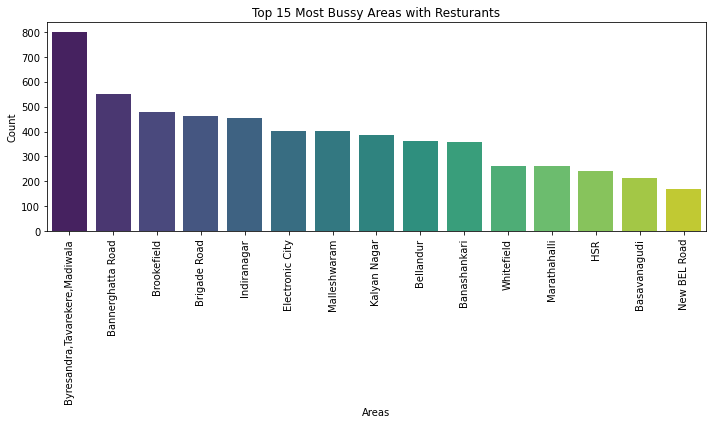

In [84]:
#plot the top 15 most populated  with resturants areas
top_15 = most_populated.nlargest(15)

#set figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15.index, y=top_15.values, palette='viridis')

# Add a title and labels
plt.title('Top 15 Most Bussy Areas with Resturants')
plt.xlabel('Areas')
plt.ylabel('Count')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

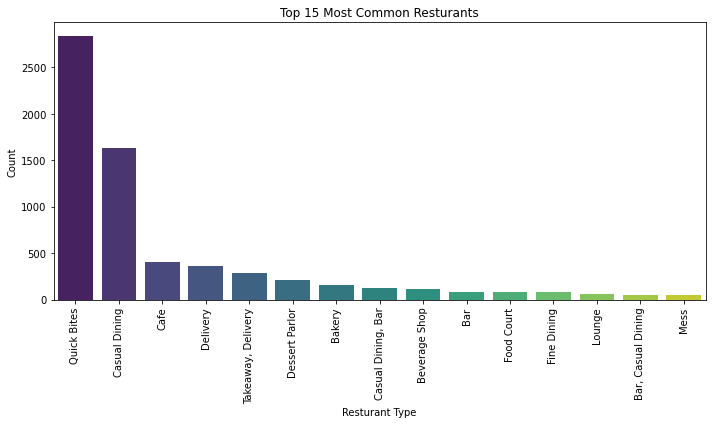

In [85]:
#most common types of resturants

#group data by resturant type
common_resturants = data.groupby('resturant_type')['count'].sum()

#select the 15 most common resturant types
common_15_types = common_resturants.nlargest(15)

#set figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=common_15_types.index, y=common_15_types.values, palette='viridis')

#add a title and labels
plt.title('Top 15 Most Common Resturants')
plt.xlabel('Resturant Type')
plt.ylabel('Count')

#rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

#show the plot
plt.tight_layout()
plt.show()


In [130]:
#most common type of resturant per area
from collections import Counter

#select only the top 15 most populated areas from the data
areas_15 = data[data['area'].isin(top_15.index)]

#select the most common resturant type per area
area_type = areas_15.groupby('area')['resturant_type'].apply(list).reset_index(name='common_types')

#create a function that selects the most common type
def find_most_common_word(word_list):
    word_counts = Counter(word_list)
    most_common_word = word_counts.most_common(1)[0][0]
    return most_common_word

area_type['most_common_type'] = area_type['common_types'].apply(find_most_common_word)

In [131]:
area_type

,area,common_types,most_common_type
0,Banashankari,"[Casual Dining, Cafe, Cafe, Quick Bites, Casua...",Quick Bites
1,Bannerghatta Road,"[Cafe, Casual Dining, Bar, Quick Bites, Delive...",Quick Bites
2,Basavanagudi,"[Casual Dining, Casual Dining, Cafe, Casual Di...",Quick Bites
3,Bellandur,"[Quick Bites, Casual Dining, Quick Bites, Casu...",Quick Bites
4,Brigade Road,"[Casual Dining, Bar, Casual Dining, Bar, Casua...",Casual Dining
5,Brookefield,"[Quick Bites, Quick Bites, Quick Bites, Quick ...",Quick Bites
6,"Byresandra,Tavarekere,Madiwala","[Quick Bites, Quick Bites, Casual Dining, Fine...",Quick Bites
7,Electronic City,"[Quick Bites, Cafe, Fine Dining, Casual Dining...",Quick Bites
8,HSR,"[Delivery, Takeaway, Delivery, Casual Dining, ...",Quick Bites
9,Indiranagar,"[Takeaway, Delivery, Casual Dining, Bar, Deliv...",Quick Bites


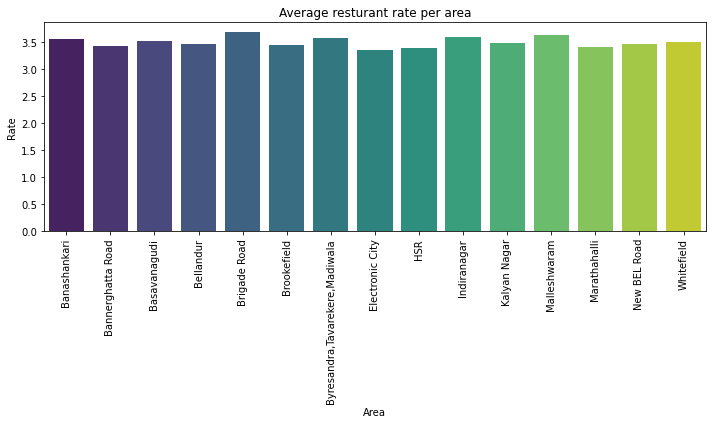

In [87]:
#mean resturants rate per area

area_rate = areas_15.groupby('area')['rate'].mean()

#plot the mean rate per area
#set figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=area_rate.index, y=area_rate.values, palette='viridis')

#add a title and labels
plt.title('Average resturant rate per area')
plt.xlabel('Area')
plt.ylabel('Rate')

#rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

#show the plot
plt.tight_layout()
plt.show()

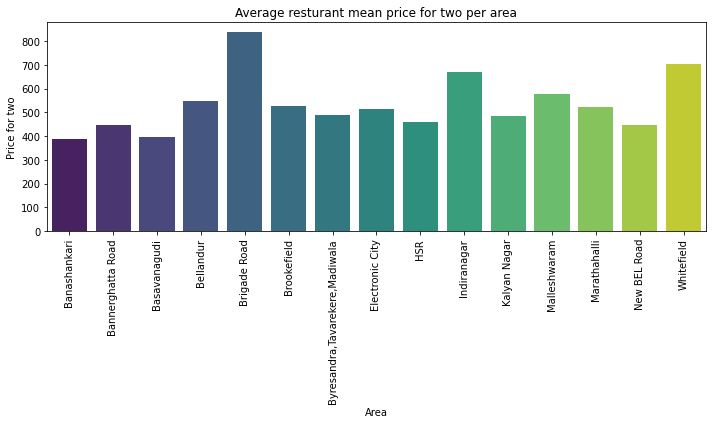

In [88]:
#mean resturants cost per area

area_rate = areas_15.groupby('area')['average_cost'].mean()

#plot the mean rate per area
#set figure size
plt.figure(figsize=(10, 6))
sns.barplot(x=area_rate.index, y=area_rate.values, palette='viridis')

#add a title and labels
plt.title('Average resturant mean price for two per area')
plt.xlabel('Area')
plt.ylabel('Price for two')

#rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

#show the plot
plt.tight_layout()
plt.show()

In [133]:
#concatenate the cuisine types per area
area_cuisine_concat = areas_15.groupby('area')['cuisines_type'].apply(list).reset_index(name='cuisine_list')

cuisine_counts = areas_15['cuisines_type'].value_counts()

#most common cuisine per area
area_cuisine_concat['most_common_cuisine'] = area_cuisine_concat['cuisine_list'].apply(find_most_common_word)

In [134]:
area_cuisine_concat

,area,cuisine_list,most_common_cuisine
0,Banashankari,"[Italian, Cafe, Fast Food, Cafe, Chinese, Cont...",South Indian
1,Bannerghatta Road,"[Cafe, Beverages, North Indian, South Indian, ...","North Indian, Chinese"
2,Basavanagudi,"[Pizza, Salad, Continental, Cafe, South Indian...",South Indian
3,Bellandur,"[Fast Food, BBQ, Continental, North Indian, Ch...",North Indian
4,Brigade Road,"[Asian, Japanese, Thai, Malaysian, Vietnamese,...",South Indian
5,Brookefield,"[South Indian, North Indian, Chinese, North In...",North Indian
6,"Byresandra,Tavarekere,Madiwala","[Fast Food, Beverages, Arabian, Sandwich, Roll...",North Indian
7,Electronic City,"[Biryani, Kebab, Cafe, North Indian, Asian, Co...","North Indian, Chinese"
8,HSR,"[North Indian, Chinese, Mithai, Street Food, N...","North Indian, Chinese"
9,Indiranagar,"[North Indian, Chinese, Continental, North Ind...",North Indian


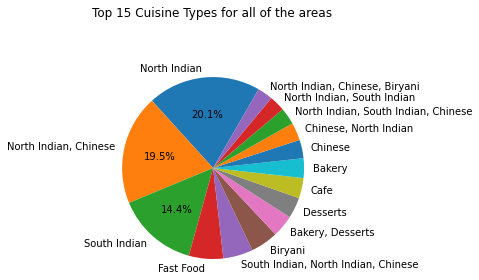

In [135]:
# Limit to the top 15 most common cuisine types for all of the areal
top_cuisine_counts = cuisine_counts.head(15)

percentage_threshold = 10

#reate a pie plot
fig, ax = plt.subplots()
ax.pie(top_cuisine_counts, 
       labels=[label if value >= percentage_threshold else '' for label, 
               value in top_cuisine_counts.items()],
                autopct=lambda p: f'{p:.1f}%' if p >= percentage_threshold else '', 
                startangle=60)
ax.axis('equal')  
fig.patch.set_facecolor('white')

# Set title
ax.set_title('Top 15 Cuisine Types for all of the areas', pad=50)

plt.tight_layout()
plt.show()

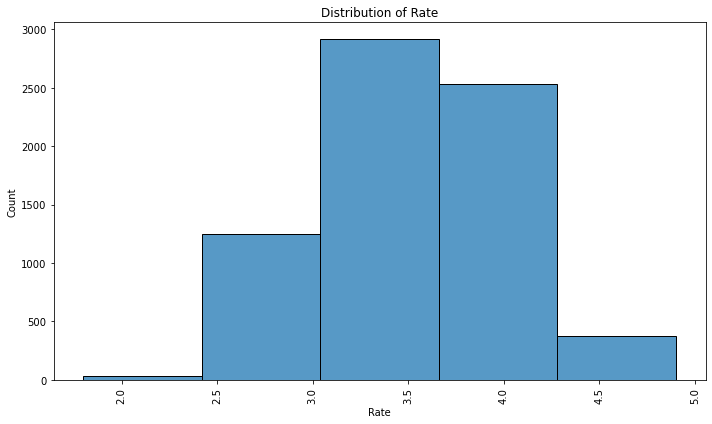

In [20]:
#distribution of rate

plt.figure(figsize=(10, 6))
sns.histplot(data, x='rate',bins=5)

# Add a title and labels
plt.title('Distribution of Rate')
plt.xlabel('Rate')
plt.ylabel('Count')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

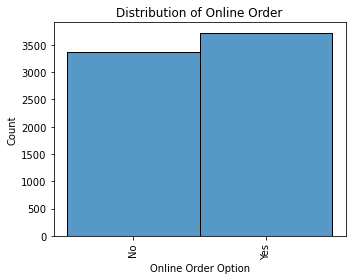

In [21]:
#distribution of online orders

plt.figure(figsize=(5, 4))
sns.histplot(data, x='online_order')

# Add a title and labels
plt.title('Distribution of Online Order')
plt.xlabel('Online Order Option')
plt.ylabel('Count')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

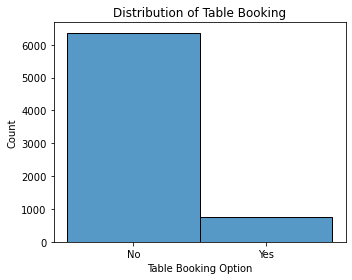

In [22]:
#distribution of table booking

plt.figure(figsize=(5, 4))
sns.histplot(data, x='table_booking')

# Add a title and labels
plt.title('Distribution of Table Booking')
plt.xlabel('Table Booking Option')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

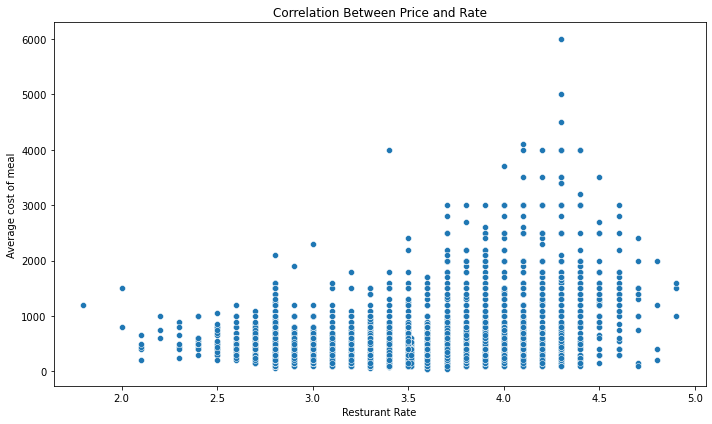

In [23]:
data

#correlation between rate and average cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x="rate", y="average_cost", data=data)

plt.title('Correlation Between Price and Rate')
plt.xlabel('Resturant Rate')
plt.ylabel('Average cost of meal')

plt.tight_layout()
plt.show()
#correlation between rate and area
